# Bikeshare Forecast


In [83]:
from datascience import *
import datetime
import warnings
warnings.filterwarnings("ignore")

##  Bike rentals data for 2011

In [84]:
bikeData = Table.read_table('data/bikes_2011.csv')

### The data table contain the following variables:

- year: year (0: 2011, 1:2012) 
- month: month (1 to 12) 
- hour: hour (0 to 23) 
- holiday: if the day is a holiday or not 
- weekday: day of the week, 0 (Sunday) to 6 (Saturday) 
- working: 1 if a day is neither weekend nor holiday, 0 otherwise. 
- weather_type : 
 	1: Clear, Few clouds, Partly cloudy
 	2: Mist, Cloudy 
 	3: Light Snow, Thunderstorm
 	4: Heavy Rain, Ice Pallets, Thunderstorm, Mist, Snow, Fog, Apocalypse 
- temp: temperature in Celsius. 
- feels_like: “feels like” temperature in Celsius (accounting for wind chill and humidity)
- humidity: humidity 
- windspeed: wind speed. 

### Finally, the dependent variable is:
- count: total count of bikes rented

In [85]:
bikeData

date,year,month,hour,holiday,weekday,working,weather_type,temp,feels_like,humidity,windspeed,count
1/1/11,0,1,0,0,6,0,1,9.02,14.6829,0.81,0,16
1/1/11,0,1,1,0,6,0,1,9.02,13.9077,0.8,0,40
1/1/11,0,1,2,0,6,0,1,9.02,13.9077,0.8,0,32
1/1/11,0,1,3,0,6,0,1,9.84,14.6829,0.75,0,13
1/1/11,0,1,4,0,6,0,1,9.84,14.6829,0.75,0,1
1/1/11,0,1,5,0,6,0,2,9.84,13.1376,0.75,6.0032,1
1/1/11,0,1,6,0,6,0,1,9.02,13.9077,0.8,0,2
1/1/11,0,1,7,0,6,0,1,8.2,13.1376,0.86,0,3
1/1/11,0,1,8,0,6,0,1,9.84,14.6829,0.75,0,8
1/1/11,0,1,9,0,6,0,1,13.12,17.7735,0.76,0,14


### Day of the month

The day of the month is not in the original data table. It can be a useful variable to process and plot the data, so we will add it to the table.

In [86]:
def get_day(s): 
    return datetime.datetime.strptime(s, "%m/%d/%y").day

bikeData['day'] = bikeData.apply(lambda date: get_day(date), ['date'])

### Looking at one day of data

Let us see how the number of rentals varies during a day.

In [87]:
def get_one_day_of_bike_counts(month=1, day=1, plot=False): 
    
    bD = bikeData.where(bikeData['month']==month)  # filter data by month
    bDD = bD.where(bD['day']==day) # filter by day of the month
    
    if plot: # optionally, plot a graph
        bDD.select(['hour','count']).plot('hour')
    
    return bDD

date,year,month,hour,holiday,weekday,working,weather_type,temp,feels_like,humidity,windspeed,count,day
10/25/11,0,10,0,0,2,1,1,18.04,22.4094,0.77,8.9981,30,25
10/25/11,0,10,1,0,2,1,1,18.04,22.4094,0.77,8.9981,11,25
10/25/11,0,10,2,0,2,1,1,17.22,21.6342,0.82,8.9981,5,25
10/25/11,0,10,3,0,2,1,1,16.4,20.8641,0.87,0,4,25
10/25/11,0,10,4,0,2,1,1,15.58,20.0889,0.87,8.9981,5,25
10/25/11,0,10,5,0,2,1,1,15.58,20.0889,0.87,8.9981,24,25
10/25/11,0,10,6,0,2,1,1,15.58,20.0889,0.82,7.0015,98,25
10/25/11,0,10,7,0,2,1,1,16.4,20.8641,0.76,12.998,314,25
10/25/11,0,10,8,0,2,1,1,18.04,22.4094,0.72,0,408,25
10/25/11,0,10,9,0,2,1,1,19.68,23.9547,0.55,15.0013,223,25


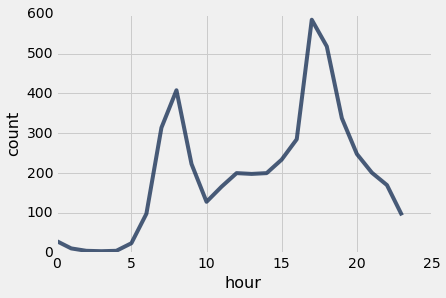

In [88]:
get_one_day_of_bike_counts(month=10, day = 25, plot=True)